In [3]:
!pip install qiskit

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 36.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.4/37.4 MB 26.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 10.3 MB/s eta 0:00:00
  Created wheel for qiskit: filename=qiskit-0.42.1-py3-none-any.whl size=12942 sha256=f3ad614a7f87fadf6fdc3a72741fe8f744c96ce94f6eb6022d0838e4d58466ef
  Stored in directory: /root/.cache/pip/wheels/91/da/30/

In [4]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136833 sha256=8ad86eb9db7f8722f07c0a0aef5a4c7c0389c692e0fcc4e715d097e972e9e12a
  Stored in directory: /root/.cache/pip/wheels/1d/c6/5a/2b7b4933c171a55d448e0c79d5841c28cf0c2207e8eca28e22
Successfully built pylatexenc


In [8]:
import numpy as np

from qiskit import *
from qiskit.visualization import *

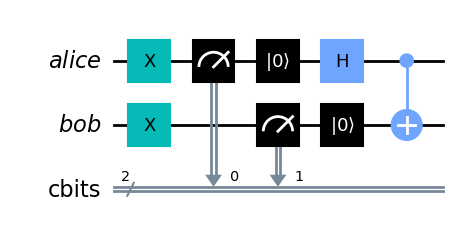

In [54]:
q_alice = QuantumRegister(1, "alice")
q_bob = QuantumRegister(1, "bob")

c = ClassicalRegister(2, "cbits")

qc = QuantumCircuit(q_alice,q_bob, c)

qc.x(0)
qc.x(1)
qc.measure([0,1], [0,1])
qc.reset([0,1])

qc.h(0)
qc.cnot(control_qubit=0, target_qubit=1)
qc.draw(output='mpl')

In [55]:
# qc.measure([0,1], [0,1])
# qc.draw(output='mpl')

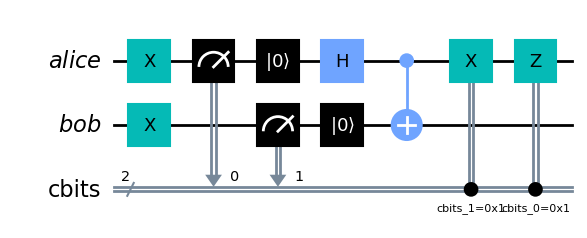

In [56]:
qc.x(0).c_if(c[1], 1)
qc.z(0).c_if(c[0], 1)
qc.draw(output='mpl')

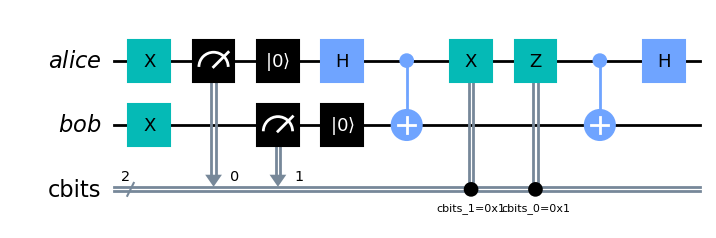

In [57]:
qc.cnot(0,1)
qc.h(0)
qc.draw(output='mpl')

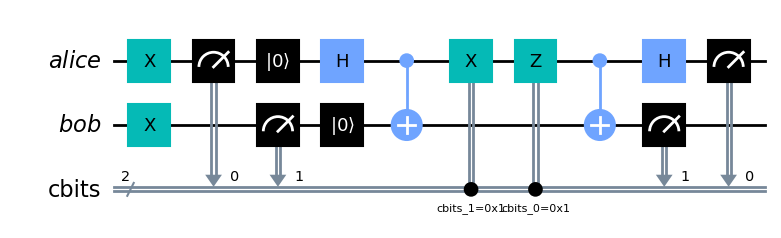

In [58]:
qc.measure([0,1], [0,1])
qc.draw(output='mpl')

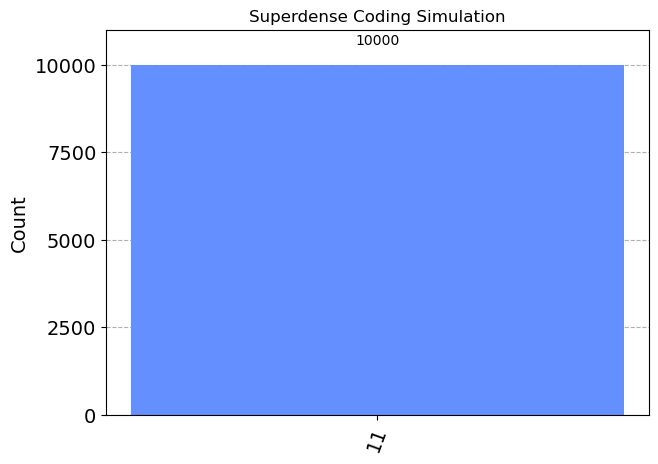

In [59]:
b = Aer.get_backend('aer_simulator')
counts = execute(qc, backend=b, shots=10000).result().get_counts()
plot_histogram(counts, title="Superdense Coding Simulation")

In [62]:
def superdense_coding(message : str):
    
    q_alice = QuantumRegister(1, "alice")
    q_bob = QuantumRegister(1, "bob")

    c = ClassicalRegister(2, "cbits")

    qc = QuantumCircuit(q_alice,q_bob, c)

    if message == "01":
        qc.x(0)
    elif message == "10":
        qc.x(1)
    elif message == "11":
        qc.x(0)
        qc.x(1)
        
    qc.measure([0,1], [0,1])
    qc.reset([0,1])

    qc.h(0)
    qc.cnot(control_qubit=0, target_qubit=1)
    
    qc.x(0).c_if(c[1], 1)
    qc.z(0).c_if(c[0], 1)
    
    qc.cnot(0,1)
    qc.h(0)
    
    qc.measure([0,1], [0,1])
    
    return qc

In [72]:
def get_results(quantum_circuit, backend):
    
    b = Aer.get_backend(backend)
    counts = execute(quantum_circuit, backend=b, shots=10000).result().get_counts()
    return counts

In [80]:
two_bit_circuit = superdense_coding('11')
c = get_results(two_bit_circuit, 'aer_simulator')
print("Counts:", c)

Counts: {'11': 10000}


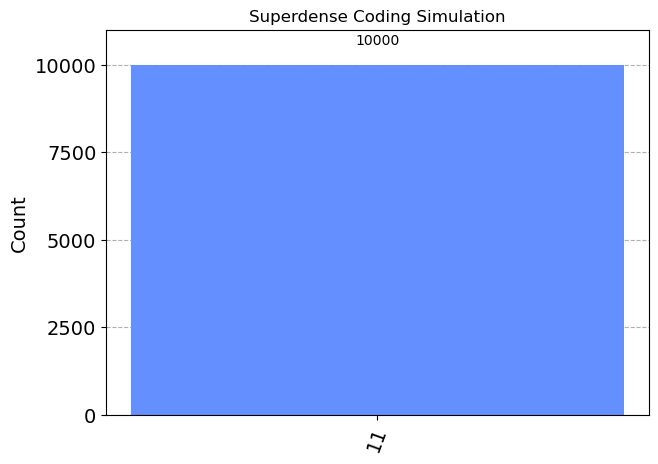

In [81]:
plot_histogram(c, title='Superdense Coding Simulation')